## **Introduction**

<a id="1"></a>

Credit risk scoring methods are widely used for evaluating potential loan applications in both financial and banking institutions. These procedures allow banks to describe the likelihood of a default over a particular time horizon. 

Financial institutions deploy models that consider the credit history of the borrowers and the inputs from their own economic stress scenarios to measure credit risk. Keen awareness is needed to identify, measure, monitor and control credit risk, guarantee sufficient capital against these risks and adequate compensation for the risks incurred.

When an institution receives a loan application, a decision regarding the approval of the loan has to be made considering the applicant’s profile. There are two types of risks assoiciated with this decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to an instituiton;

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial.

The data for this specific scenario is provided by UCI Machine Larning Repository collection of databases, domain theories, and data generators widely used by the machine learning community for empirical studies. 

The dataset is available at: https://www.kaggle.com/datasets/laotse/credit-risk-dataset/data

Dataset Description:
- person_age: Age of the individual applying for the loan.
- person_income: Annual income of the individual.
- person_home_ownership: Type of home ownership of the individual.
    * rent: The individual is currently renting a property.
    * mortgage: The individual has a mortgage on the property they own.
    * own: The individual owns their home outright.
    * other: Other categories of home ownership that may be specific to the dataset.
- person_emp_length: Employment length of the individual in years.
- loan_intent: The intent behind the loan application.
- loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.
    * A: The borrower has a high creditworthiness, indicating low risk.
    * B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
    * C: The borrower's creditworthiness is moderate.
    * D: The borrower is considered to have higher risk compared to previous grades.
    * E: The borrower's creditworthiness is lower, indicating a higher risk.
    * F: The borrower poses a significant credit risk.
    * G: The borrower's creditworthiness is the lowest, signifying the highest risk.
- loan_amnt: The loan amount requested by the individual.
- loan_int_rate: The interest rate associated with the loan.
- loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
    * 0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
    * 1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
- loan_percent_income: The percentage of income represented by the loan amount.
- cb_person_default_on_file: Historical default of the individual as per credit bureau records.
    * Y: The individual has a history of defaults on their credit file.
    * N: The individual does not have any history of defaults.
- cb_preson_cred_hist_length: The length of credit history for the individual.

## **Importing libraries**

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import category_encoders as ce
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import warnings
from sklearn.model_selection import GridSearchCV
from numpy.random import seed
seed(42)

**Additional configuration features for easier visualization**

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 0)
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

**Checking Working Directory**

In [3]:
print("Current Working Directory:", os.getcwd()) 

Current Working Directory: C:\Users\raimu\OneDrive - NOVAIMS\6. Classes\2023_2024\Deep Learning Methods in Finance\Notebooks\Credit Risk


## **Importing Data**

<a id="3"></a>

---

In [4]:
df_train = pd.read_csv("credit_risk_dataset.csv")

In [5]:
df_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
df_train.dtypes.value_counts()

int64      5
object     4
float64    3
Name: count, dtype: int64

## **Dataset Statistics and Initial Pre Processing**

---

<a id="4"></a>

Descriptive statistics for each of the numerical variable show the mean, standard deviation, minimum & maximum values and values which fall within 25/50/75% of the total data. 

In [7]:
df_train.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.00000,32581.00000,31686.00000,32581.00000,29465.00000,32581.00000,32581.00000,32581.00000
mean,27.73460,66074.84847,4.78969,9589.37111,11.01169,0.21816,0.17020,5.80421
std,6.34808,61983.11917,4.14263,6322.08665,3.24046,0.41301,0.10678,4.05500
min,20.00000,4000.00000,0.00000,500.00000,5.42000,0.00000,0.00000,2.00000
25%,23.00000,38500.00000,2.00000,5000.00000,7.90000,0.00000,0.09000,3.00000
50%,26.00000,55000.00000,4.00000,8000.00000,10.99000,0.00000,0.15000,4.00000
75%,30.00000,79200.00000,7.00000,12200.00000,13.47000,0.00000,0.23000,8.00000
max,144.00000,6000000.00000,123.00000,35000.00000,23.22000,1.00000,0.83000,30.00000


In [8]:
print('This dataframe has {} rows and {} columns.'.format(df_train.shape[0], df_train.shape[1]))

This dataframe has 32581 rows and 12 columns.


**Missing Data**

In [9]:
def missing_data(df_train):
    
    total = df_train.isnull().sum()
    percent = (df_train.isnull().sum() / df_train.isnull().count() * 100).map('{:.2f}%'.format)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df_train.columns:
        dtype = str(df_train[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    
    return(np.transpose(tt))

In [10]:
missing_data(df_train)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
Total,0,0,0,895,0,0,0,3116,0,0,0,0
Percent,0.00%,0.00%,0.00%,2.75%,0.00%,0.00%,0.00%,9.56%,0.00%,0.00%,0.00%,0.00%
Types,int64,int64,object,float64,object,object,int64,float64,int64,float64,object,int64


For simplicity sake, I have opted to drop the missing data. Please note that there are many different ways of treating missing values, often times it is better to aks, if possible, for more data than to delete data without any reason for it

In [11]:
df_train = df_train.dropna()

### **Target Variable: "Loan_status"**
---

In machine learning, classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. Classification is the process where computers group data together based on predetermined characteristics — supervised learning.

In this scenario, we are dealing with a **`binary classification`** problem. Class labels are often string values and must be mapped to numeric values before being provided to an algorithm for modeling. This is often referred to as label encoding.

To model credit risk our target variable can only take two values:
- If the applicant does not default = 0
- If the applicant defaults = 1

Lets start this analysis by looking at variable "Loan_Status"

In [12]:
df_train['loan_status'].value_counts(normalize=False)

loan_status
0    22435
1    6203 
Name: count, dtype: int64

By plotting this information it is evident that we are dealing with a clear **`class imbalance problem:`**

- Loans that are fully paid account for 78.34% of the data

- Loans that have charged off only account for 21.66%

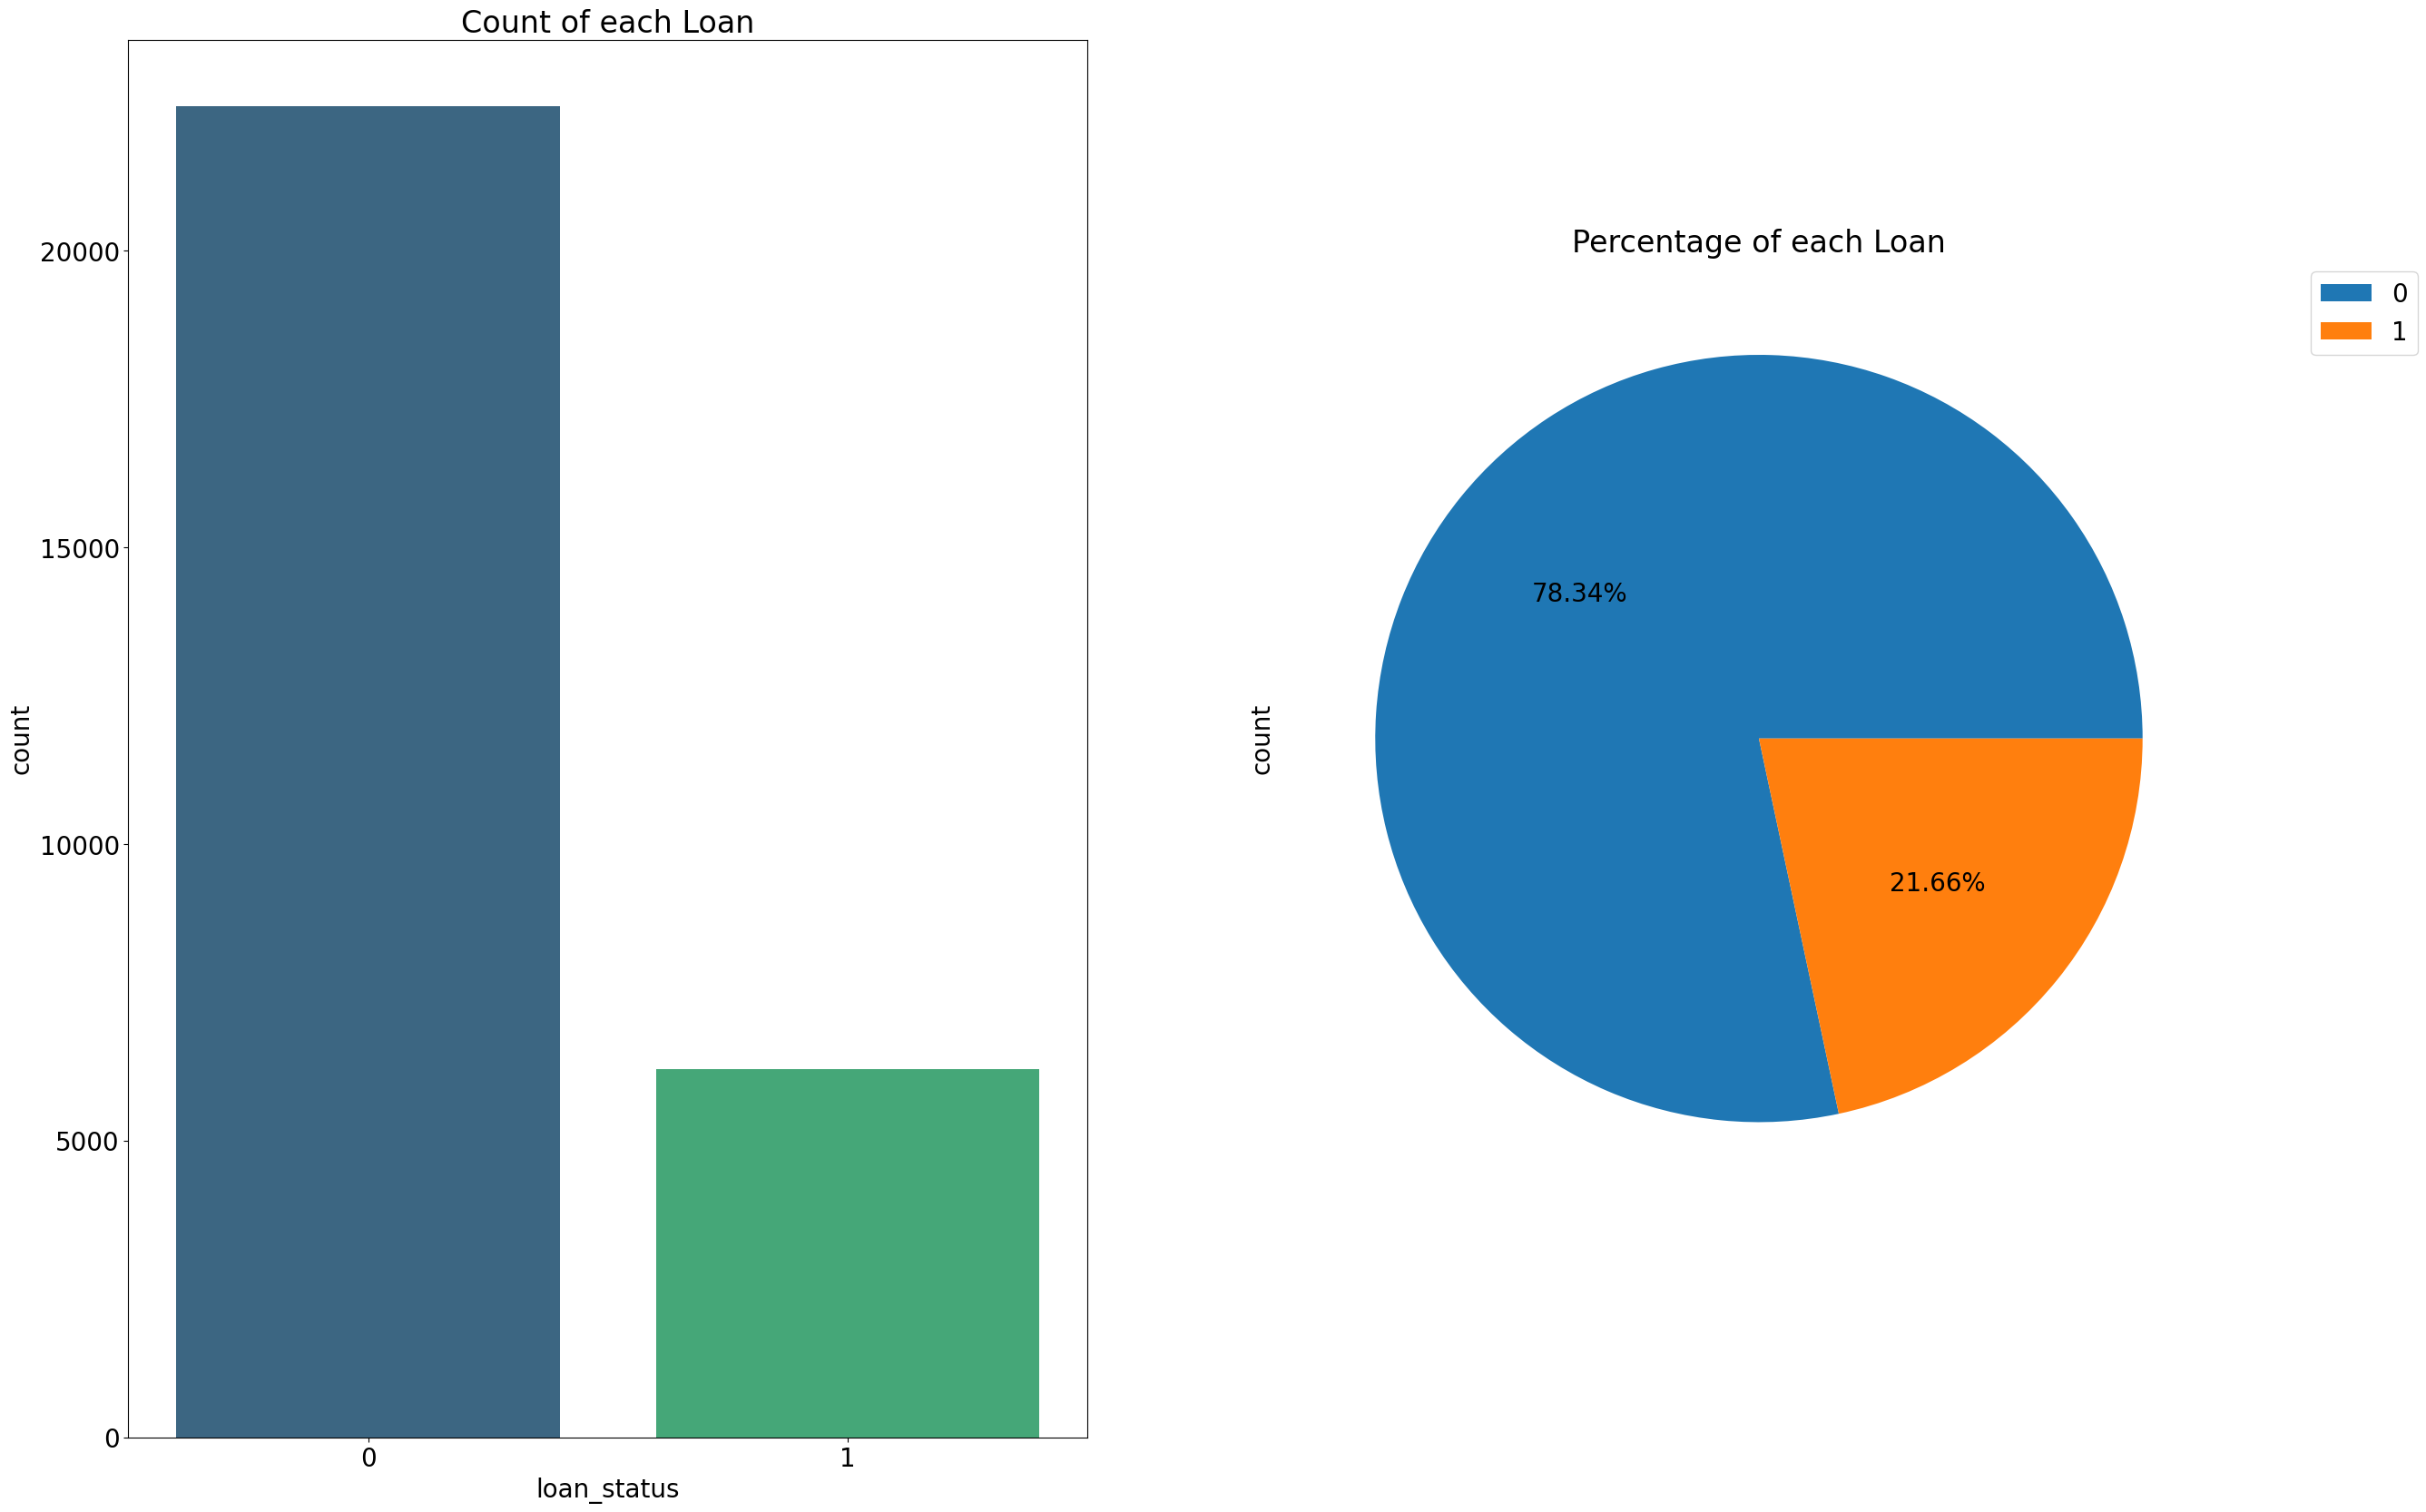

In [13]:
# Increase the font size
plt.rcParams['font.size'] = 20

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(30, 20))

# Plot countplot
sns.countplot(x='loan_status', data=df_train, ax=axs[0], palette='viridis')
axs[0].set_title("Count of each Loan")
axs[0].set_xlabel("loan_status")  # Add xlabel for better visibility

# Plot pie chart
df_train.loan_status.value_counts().plot(x=None, y=None, kind='pie', ax=axs[1], autopct='%1.2f%%', labels=None)
axs[1].set_title("Percentage of each Loan")
axs[1].legend(df_train.loan_status.value_counts().index, loc="upper right", bbox_to_anchor=(1.2, 1))  # Add legend for better visibility

# Remove grid
axs[0].grid(False)
axs[1].grid(False)

# Show the plot
plt.show()

----

## **Exploratory Data Analysis**

---

### **Variable Person_age**: Age of the person


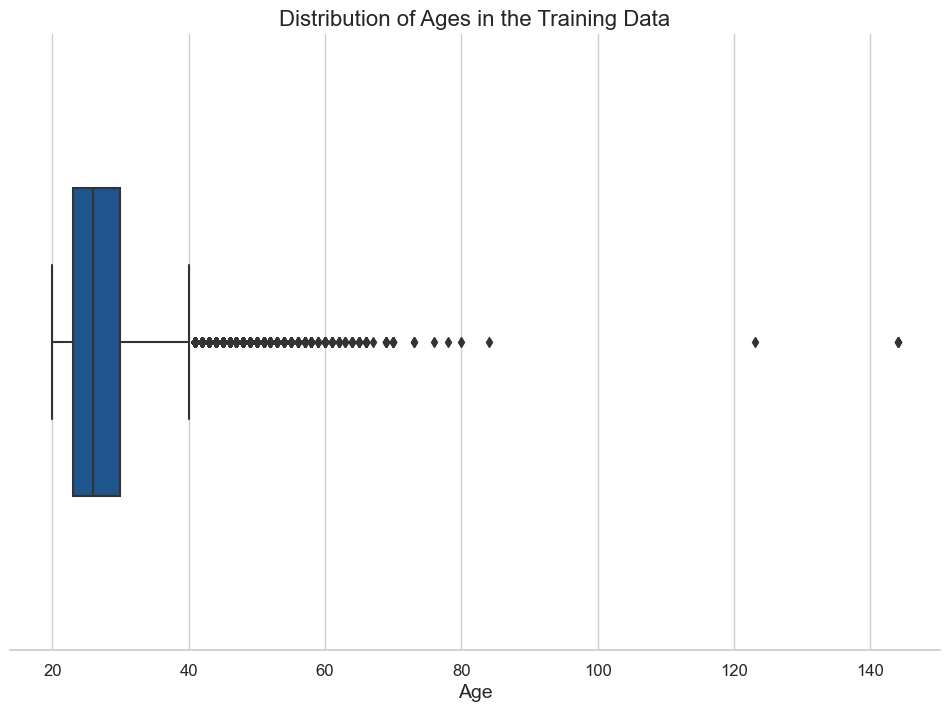

In [14]:
# Set a custom color palette
custom_palette = sns.color_palette("Blues_r")

# Set Seaborn style
sns.set(style="whitegrid")

# Increase the figure size
plt.figure(figsize=(12, 8))

# Create a more customized box plot
sns.boxplot(x='person_age', data=df_train, palette=custom_palette, width=0.5, fliersize=5)

# Add title and labels
plt.title('Distribution of Ages in the Training Data', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('')

# Customize axis ticks and grid
plt.xticks(fontsize=12)
plt.yticks([])  # Hide y-axis ticks for better clarity
sns.despine(left=True)  # Remove left spine for a cleaner look

# Show the plot
plt.show()

Looking at the age variable in the box plot it seems that ages range from 20 up until 144. Its important to look at these later values as these may constitute outlier in our data

In [15]:
age_above_90 = df_train[df_train['person_age'] > 90]

age_above_90.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


We have 4 records of data points where the age seems to be well above the average. Due to this I have opted to drop this erroneous data

In [16]:
df_train = df_train[df_train['person_age'] <= 90]

For plot convenience I have also opted to group the ages on four different categories:
    
 - Young adults (between 18 and 25)
 - Adults (between 25 and 40)
 - Senior (between 40 and 55)
 - Elder (above 55)
 
A new variable Age_Group was created

In [17]:
conditions = [
    
    (df_train['person_age'] > 18) & (df_train['person_age'] < 25),
    (df_train['person_age'] >= 25) & (df_train['person_age'] <= 40),
    (df_train['person_age'] > 40) & (df_train['person_age'] <= 55),
    (df_train['person_age'] > 55)
]

values = ['Young', 'Young Adults', 'Senior', 'Elder']

# Create the 'Age_Group' column using np.select
df_train['Age_Group'] = np.select(conditions, values, default=np.nan)

# Drop the original 'person_age' column
df_train.drop(['person_age'], axis=1, inplace=True)

df_train.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Age_Group
0,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,Young
1,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,Young
2,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,Young Adults
3,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,Young
4,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,Young


**Pivot Table by loan intent and age group**

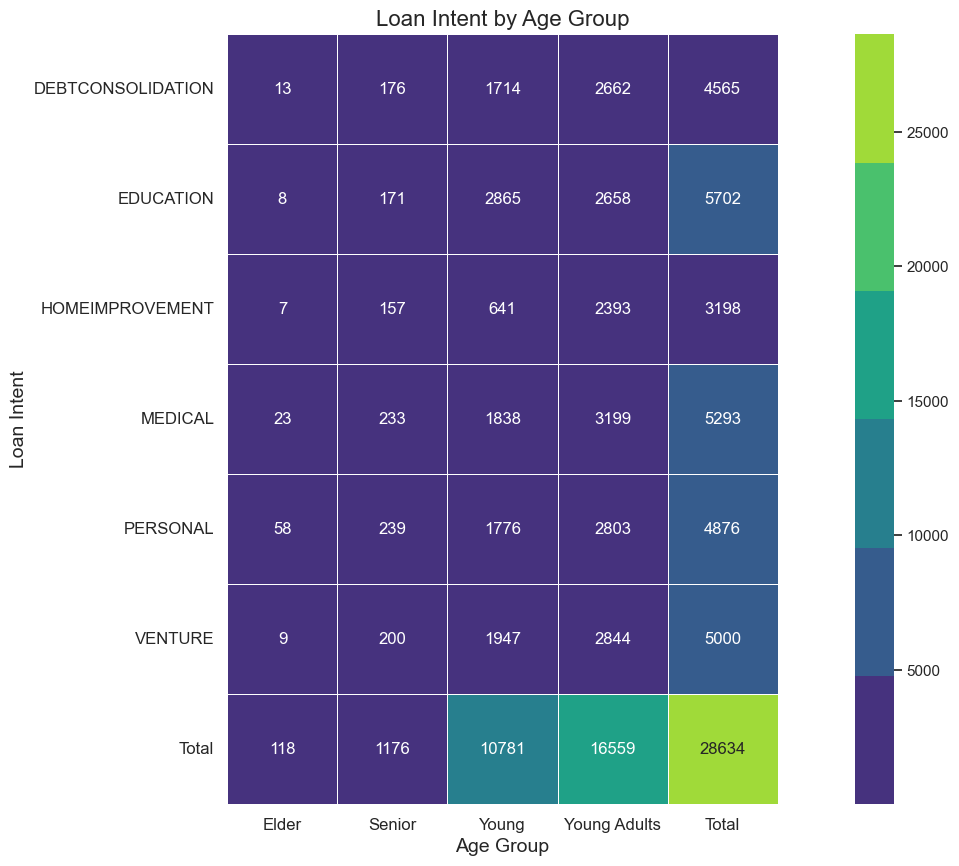

In [18]:
# Set Seaborn style and color palette
sns.set(style="whitegrid")
custom_palette = sns.color_palette("viridis")

# Create a crosstab to analyze the relationship between loan intent and age group
ct = pd.crosstab(df_train['loan_intent'], df_train['Age_Group'], margins=True, margins_name='Total')

# Plot a heatmap with enhancements
plt.figure(figsize=(20, 10))
sns.heatmap(ct, annot=True, cmap=custom_palette, fmt='d', linewidths=.5, cbar=True, annot_kws={"size": 12}, square=True)

# Add title and labels
plt.title('Loan Intent by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Loan Intent', fontsize=14)

# Customize axis ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()


As per loan intent distribution it seems most loans fall within the Young and Young Adults age category. If we go by loan intent Education seems to be ahead followed by Medical and Venture 

**Relationship between Age Group and Loan Amount**

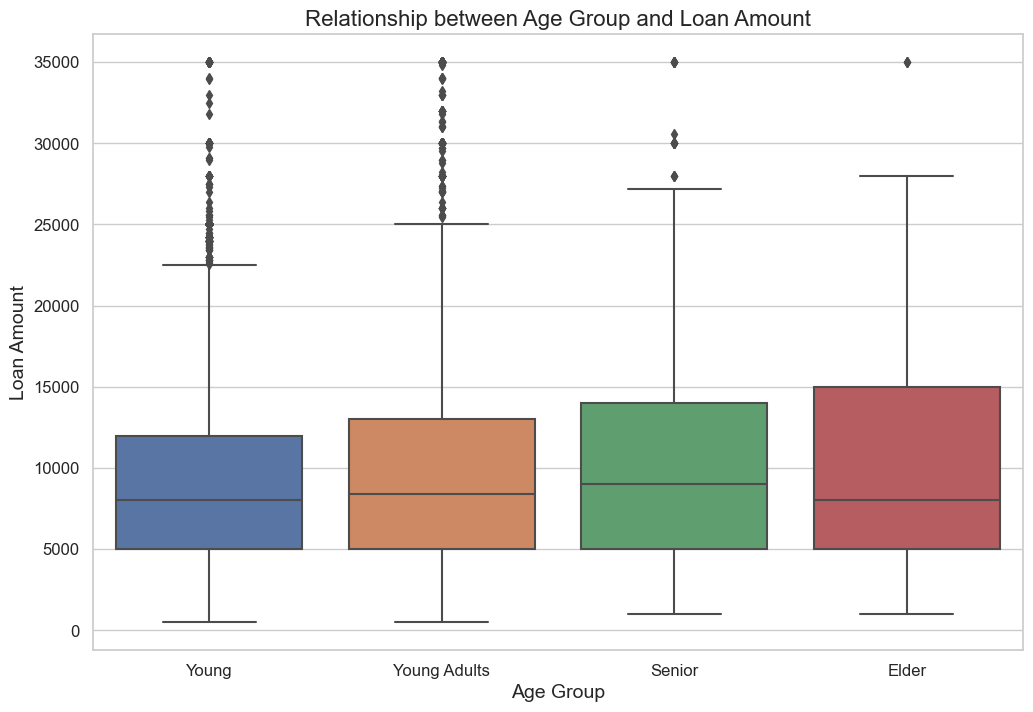

In [19]:
sns.set(style="whitegrid")
custom_palette = sns.color_palette("deep")

# Increase the figure size
plt.figure(figsize=(12, 8))

# Create a box plot to show the distribution of loan amounts by age group
sns.boxplot(x='Age_Group', y='loan_amnt', data=df_train, palette=custom_palette, order=['Young', 'Young Adults', 'Senior', 'Elder'])

# Add title and labels
plt.title('Relationship between Age Group and Loan Amount', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)

# Customize axis ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

**Relationship between Default History and Age Group**

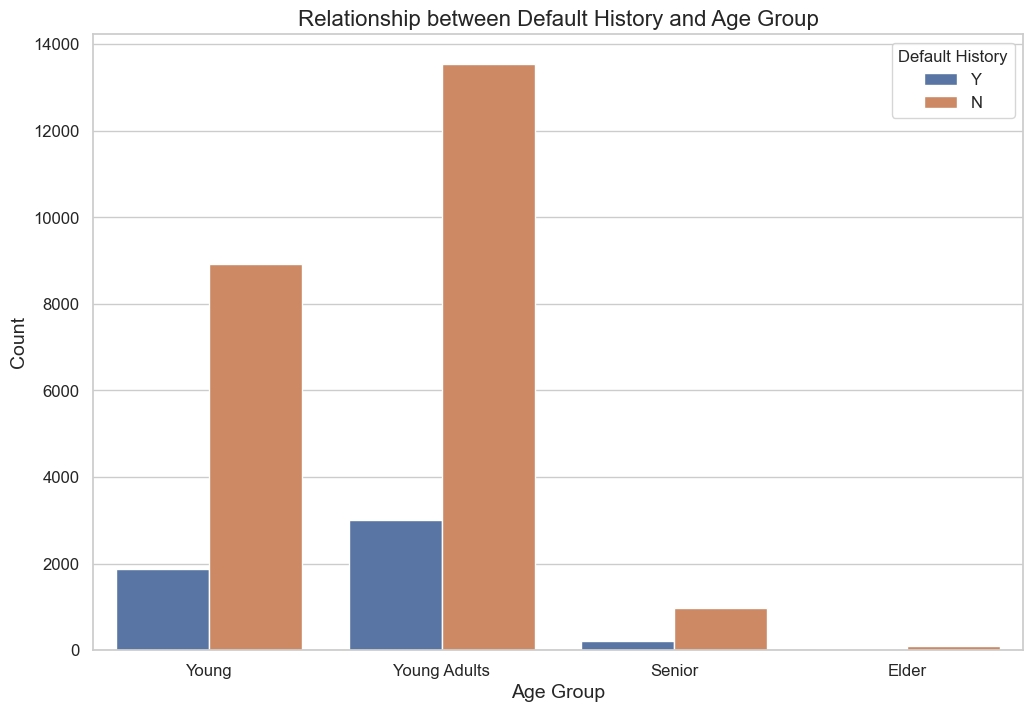

In [20]:
sns.set(style="whitegrid")
custom_palette = sns.color_palette("deep")

# Increase the figure size
plt.figure(figsize=(12, 8))

# Create a countplot to show the relationship between 'cb_person_default_on_file' and 'Age_Group'
sns.countplot(x='Age_Group', hue='cb_person_default_on_file', data=df_train, palette=custom_palette, order=['Young', 'Young Adults', 'Senior', 'Elder'])

# Add title and labels
plt.title('Relationship between Default History and Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize axis ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Default History', fontsize=12)

# Show the plot
plt.show()

The Younger crowd seems to have a longer history of defualts.

In [21]:
df_train.groupby('Age_Group')['loan_status'].value_counts(normalize=True)

Age_Group     loan_status
Elder         0              0.745763
              1              0.254237
Senior        0              0.798469
              1              0.201531
Young         0              0.769687
              1              0.230313
Young Adults  0              0.791473
              1              0.208527
Name: proportion, dtype: float64

As per default probability the Younger crowd stands at 23%. Elders also face a higher probability of default but they have much less loan requests

### **Variable Loan Intent:** A category provided by the borrower for the loan request.

In [22]:
df_train['loan_intent'].describe()

count     28634    
unique    6        
top       EDUCATION
freq      5702     
Name: loan_intent, dtype: object

In [23]:
df_train['loan_intent'].value_counts()

loan_intent
EDUCATION            5702
MEDICAL              5293
VENTURE              5000
PERSONAL             4876
DEBTCONSOLIDATION    4565
HOMEIMPROVEMENT      3198
Name: count, dtype: int64

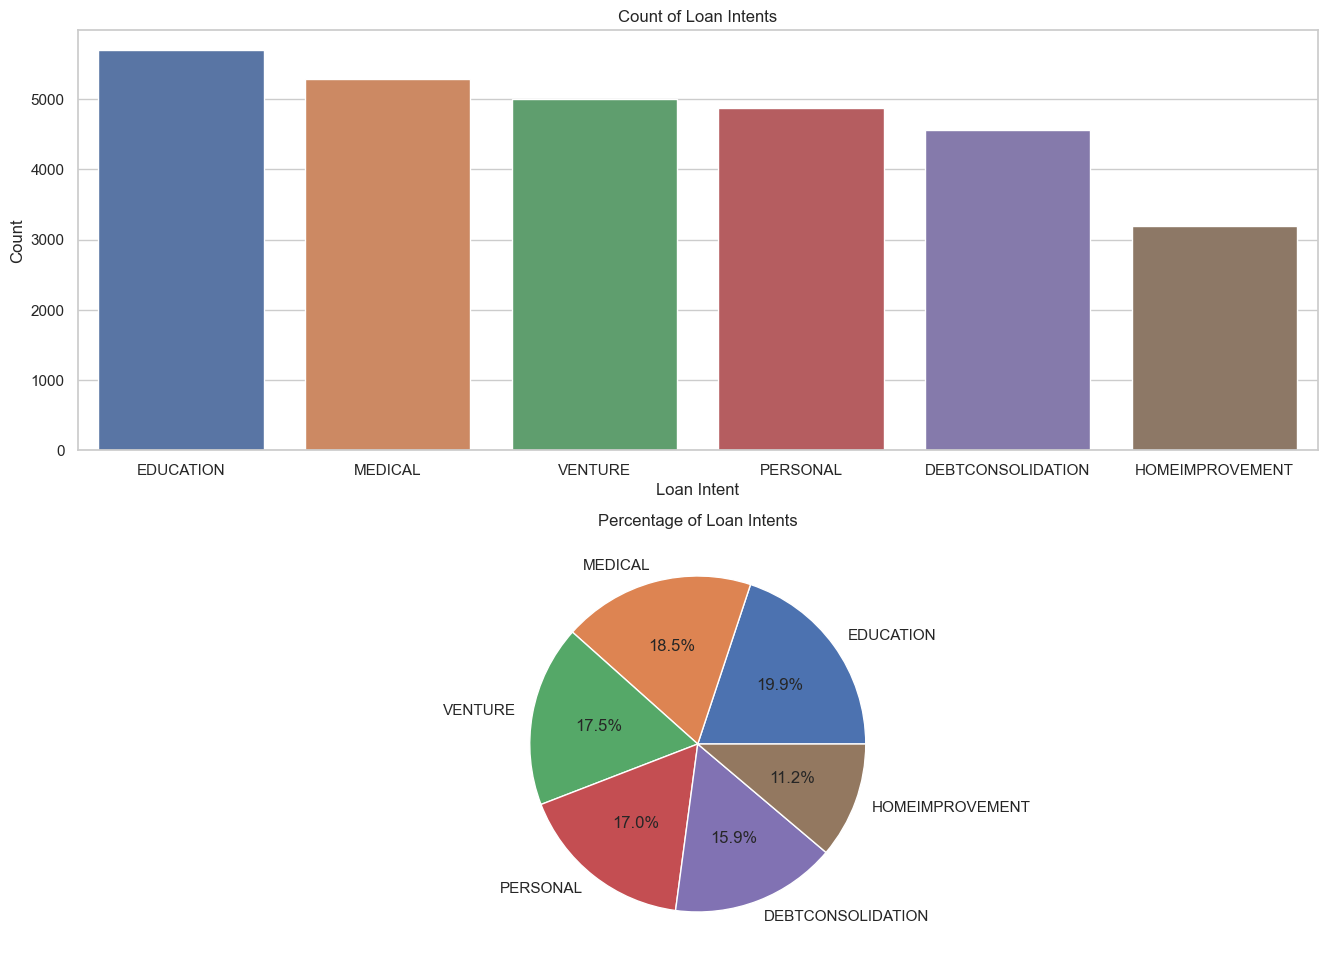

In [24]:
# Set Seaborn style and color palette
sns.set(style="whitegrid")
custom_palette = sns.color_palette("deep")

# Order loan intents by count in descending order
order_by_count = df_train['loan_intent'].value_counts().index

# Create a subplot with two axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))

# Plot count of loan intents using a bar chart
sns.countplot(x='loan_intent', data=df_train, palette=custom_palette, order=order_by_count, ax=axes[0])
axes[0].set_title('Count of Loan Intents')
axes[0].set_xlabel('Loan Intent')
axes[0].set_ylabel('Count')

# Plot percentage of loan intents using a pie chart
loan_intent_counts = df_train['loan_intent'].value_counts()
axes[1].pie(loan_intent_counts, labels=loan_intent_counts.index, autopct='%1.1f%%', colors=custom_palette)
axes[1].set_title('Percentage of Loan Intents')

# Show the plot
plt.show()

In [25]:
df_train.groupby('loan_intent')['loan_status'].value_counts(normalize=True)

loan_intent        loan_status
DEBTCONSOLIDATION  0              0.716101
                   1              0.283899
EDUCATION          0              0.829709
                   1              0.170291
HOMEIMPROVEMENT    0              0.743277
                   1              0.256723
MEDICAL            0              0.731532
                   1              0.268468
PERSONAL           0              0.802502
                   1              0.197498
VENTURE            0              0.853800
                   1              0.146200
Name: proportion, dtype: float64

It seems that the highest probability of default belongs to the Debt Consolidation category

### **Person_emp_length:** Employment length (in years)

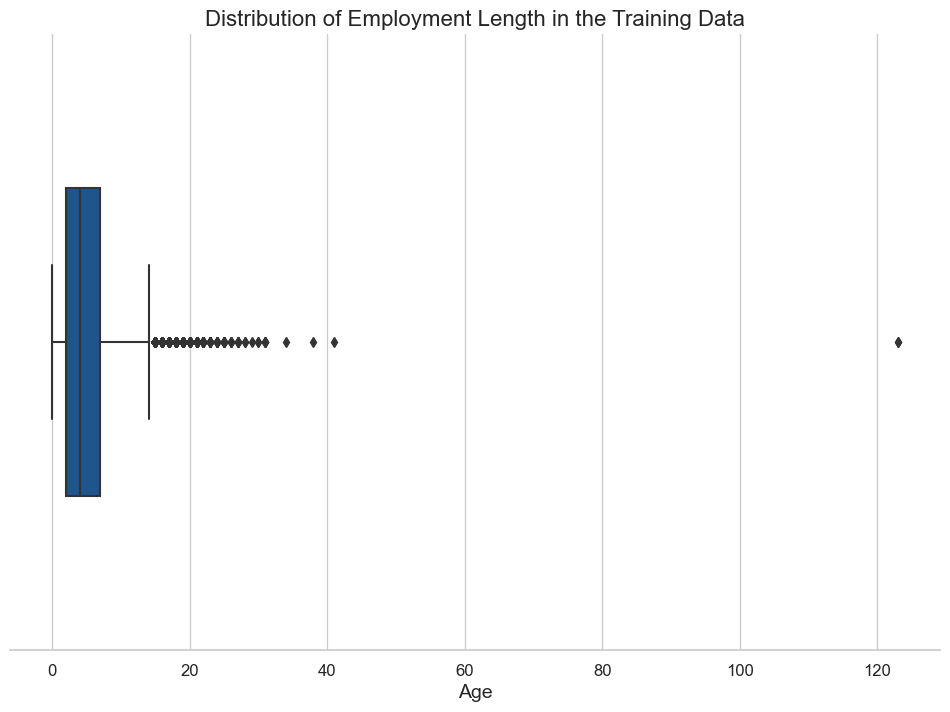

In [26]:
# Set a custom color palette
custom_palette = sns.color_palette("Blues_r")

# Set Seaborn style
sns.set(style="whitegrid")

# Increase the figure size
plt.figure(figsize=(12, 8))

# Create a more customized box plot
sns.boxplot(x='person_emp_length', data=df_train, palette=custom_palette, width=0.5, fliersize=5)

# Add title and labels
plt.title('Distribution of Employment Length in the Training Data', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('')

# Customize axis ticks and grid
plt.xticks(fontsize=12)
plt.yticks([])  # Hide y-axis ticks for better clarity
sns.despine(left=True)  # Remove left spine for a cleaner look

# Show the plot
plt.show()

There is data that falls way outside of the norm. Lets take a look at it:

In [27]:
emp_above_50 = df_train[df_train['person_emp_length'] > 50]

emp_above_50.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Age_Group
0,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,Young
210,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4,Young


By the looks of the information above, we seem to have two Young people that have worked for 123 years. Like before this does not make any sense so I have opted to drop these data points.

In [28]:
df_train = df_train[df_train['person_emp_length'] <= 50]

### **Variable loan_grade:** Employment length (in years)

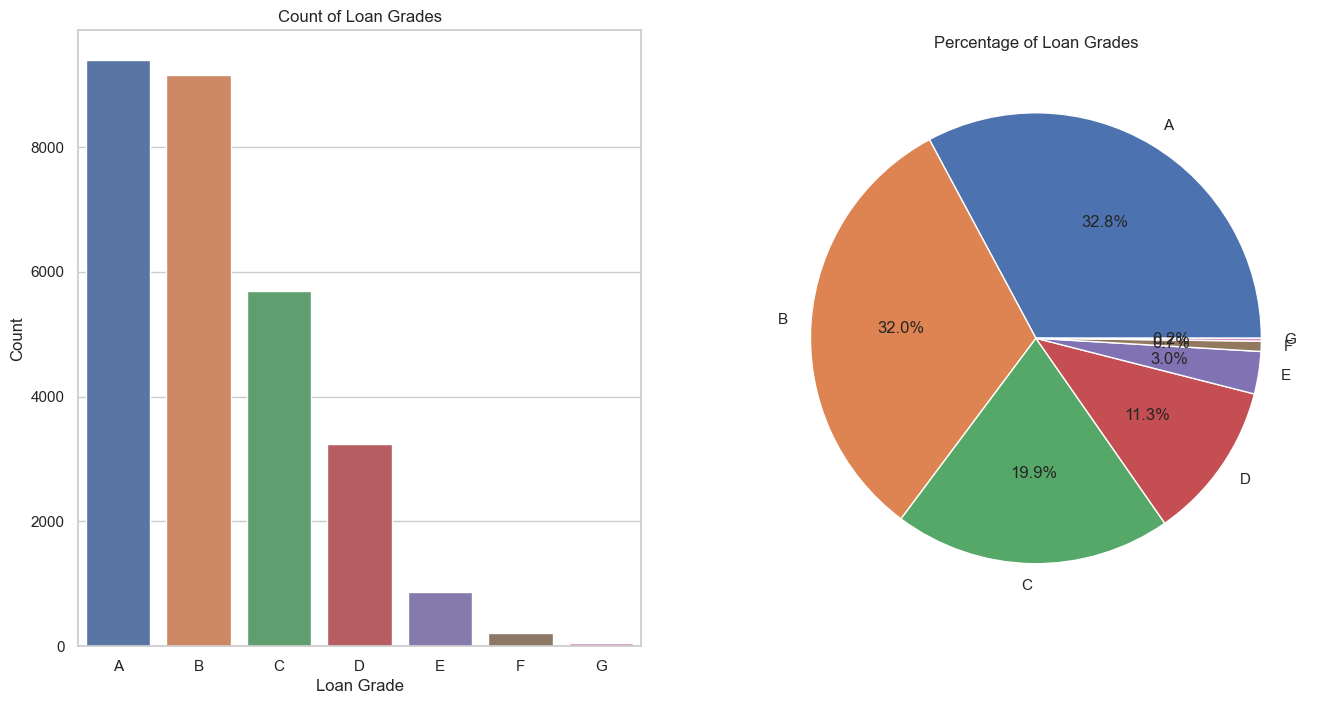

In [29]:
# Set Seaborn style and color palette
sns.set(style="whitegrid")
custom_palette = sns.color_palette("deep")

# Create a subplot with two axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot count of loan grades using a bar chart
sns.countplot(x='loan_grade', data=df_train, palette=custom_palette, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ax=axes[0])
axes[0].set_title('Count of Loan Grades')
axes[0].set_xlabel('Loan Grade')
axes[0].set_ylabel('Count')

# Plot percentage of loan grades using a pie chart
loan_grade_counts = df_train['loan_grade'].value_counts()
axes[1].pie(loan_grade_counts, labels=loan_grade_counts.index, autopct='%1.1f%%', colors=custom_palette)
axes[1].set_title('Percentage of Loan Grades')

# Show the plot
plt.show()

It seems most loans fall in the A and B grades

**Relationship between grade and interest rate**

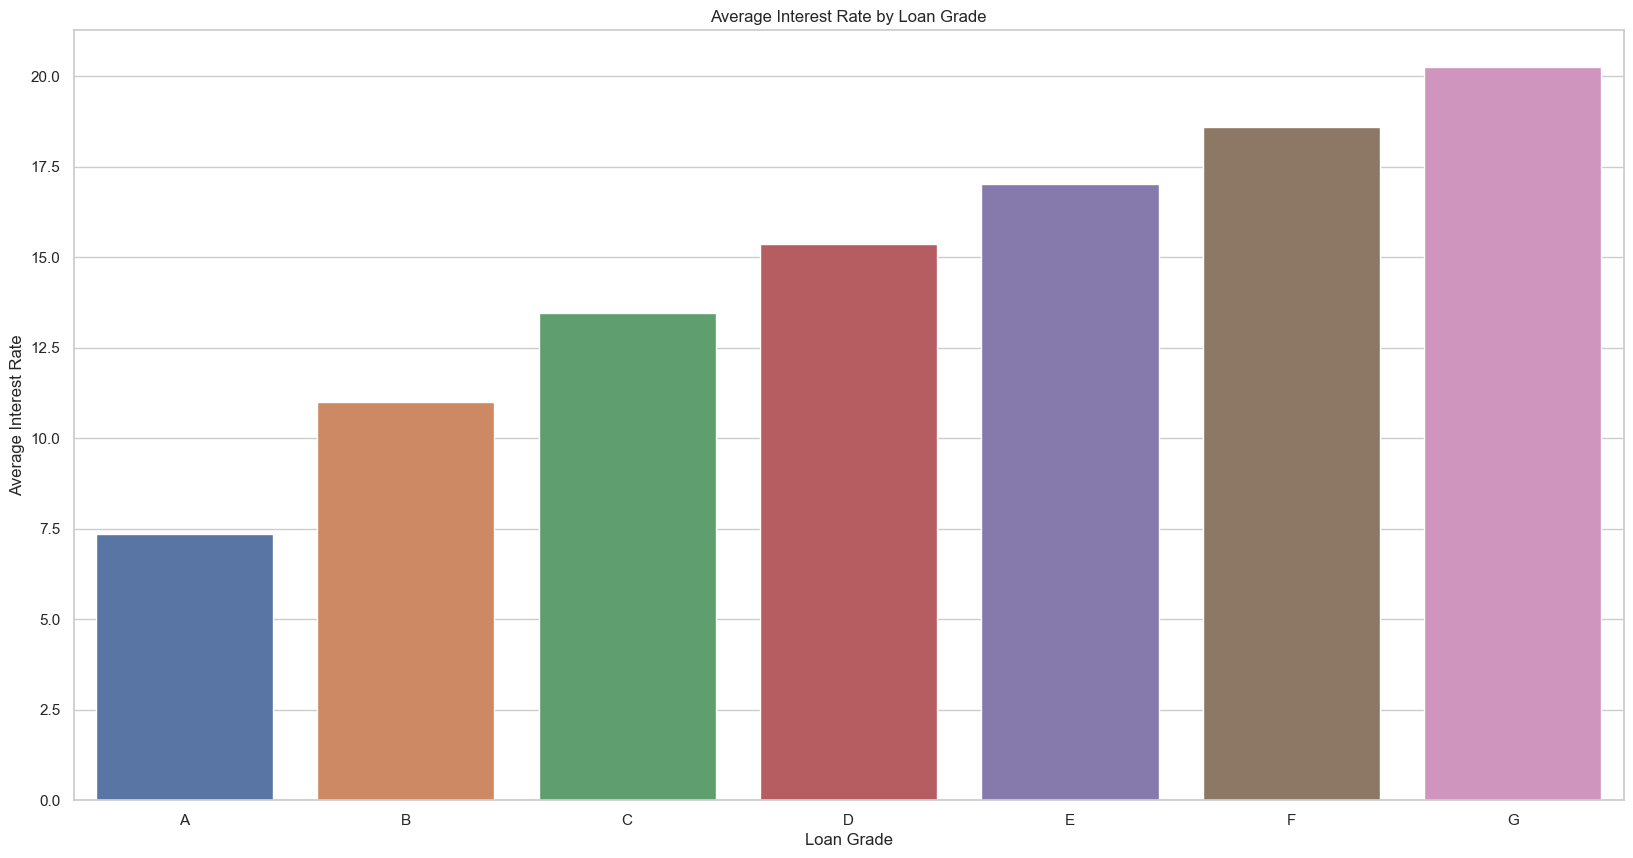

In [30]:
# Calculate average interest rate for each loan grade
avg_int_rate_by_grade = df_train.groupby('loan_grade')['loan_int_rate'].mean().reset_index()

# Define a color palette
custom_palette = sns.color_palette("deep", n_colors=len(avg_int_rate_by_grade))

# Bar Chart of Average Interest Rate by Loan Grade with Palette
plt.figure(figsize=(20, 10))
sns.barplot(x='loan_grade', y='loan_int_rate', data=avg_int_rate_by_grade, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette=custom_palette)
plt.title('Average Interest Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Average Interest Rate')
plt.show()

There is a clear positive relationship when we analyse both the grade and interest rate. Interest rate is higher as the grade for the loan is  which makes sense. As the grade tends to aggravate, the interest rate is higher for said loans. This correlation is logical, if an applicant is likely to default extra steps should be taken to ensure the proper protection against the risk of non-remittance

### **Variable Home Ownership:** Type of home ownership of the individual

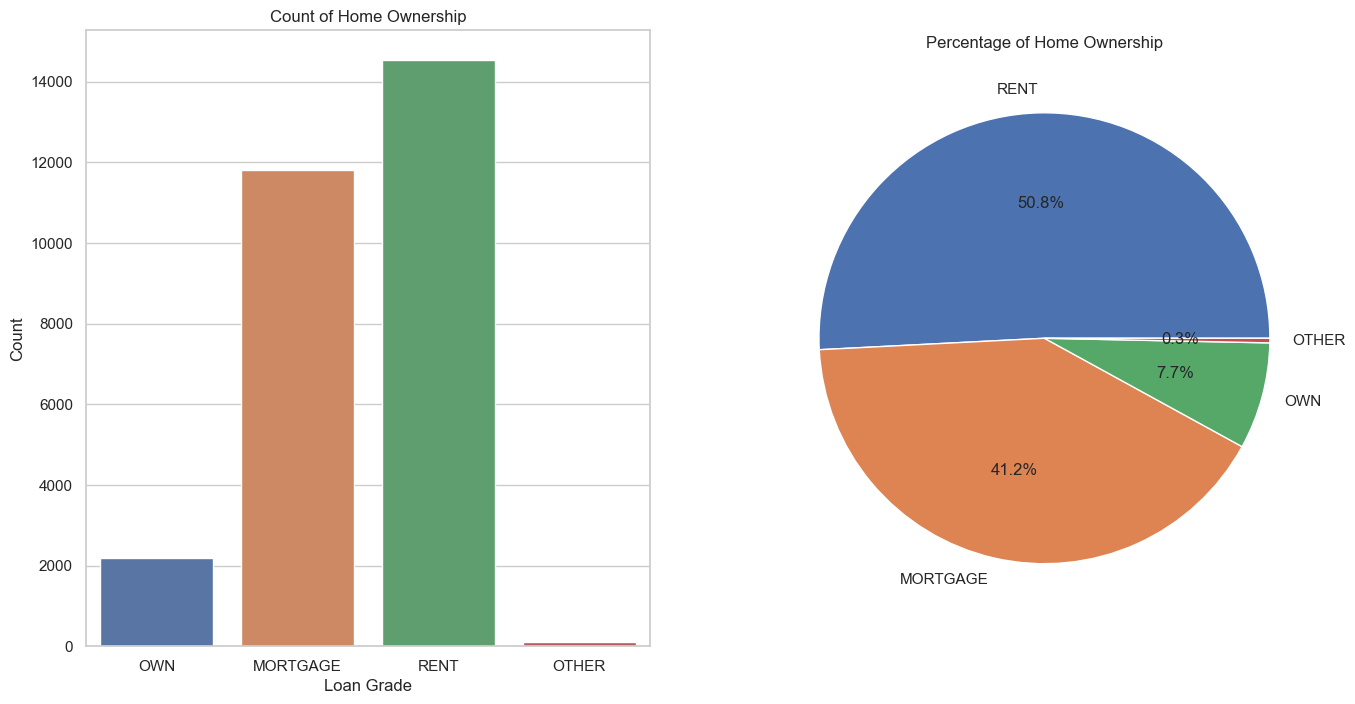

In [31]:
# Set Seaborn style and color palette
sns.set(style="whitegrid")
custom_palette = sns.color_palette("deep")

# Create a subplot with two axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot count of loan grades using a bar chart
sns.countplot(x='person_home_ownership', data=df_train, palette=custom_palette, ax=axes[0])
axes[0].set_title('Count of Home Ownership')
axes[0].set_xlabel('Loan Grade')
axes[0].set_ylabel('Count')

# Plot percentage of loan grades using a pie chart
loan_grade_counts = df_train['person_home_ownership'].value_counts()
axes[1].pie(loan_grade_counts, labels=loan_grade_counts.index, autopct='%1.1f%%', colors=custom_palette)
axes[1].set_title('Percentage of Home Ownership')

# Show the plot
plt.show()

In [32]:
df_train.groupby('person_home_ownership')['loan_status'].value_counts(normalize=True)

person_home_ownership  loan_status
MORTGAGE               0              0.874131
                       1              0.125869
OTHER                  0              0.712766
                       1              0.287234
OWN                    0              0.933394
                       1              0.066606
RENT                   0              0.687655
                       1              0.312345
Name: proportion, dtype: float64

Applicants in the Rent category are more likely to default (31%)

## **Pearson Correlation Matrix**
---
We use the Pearson correlation coefficient to examine the strength and direction of the linear relationship between two continuous variables.

The correlation coefficient can range in value from −1 to +1. The larger the absolute value of the coefficient, the stronger the relationship between the variables. For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship. A correlation close to 0 indicates no linear relationship between the variables. 

The sign of the coefficient indicates the direction of the relationship. If both variables tend to increase or decrease together, the coefficient is positive, and the line that represents the correlation slopes upward. If one variable tends to increase as the other decreases, the coefficient is negative, and the line that represents the correlation slopes downward.

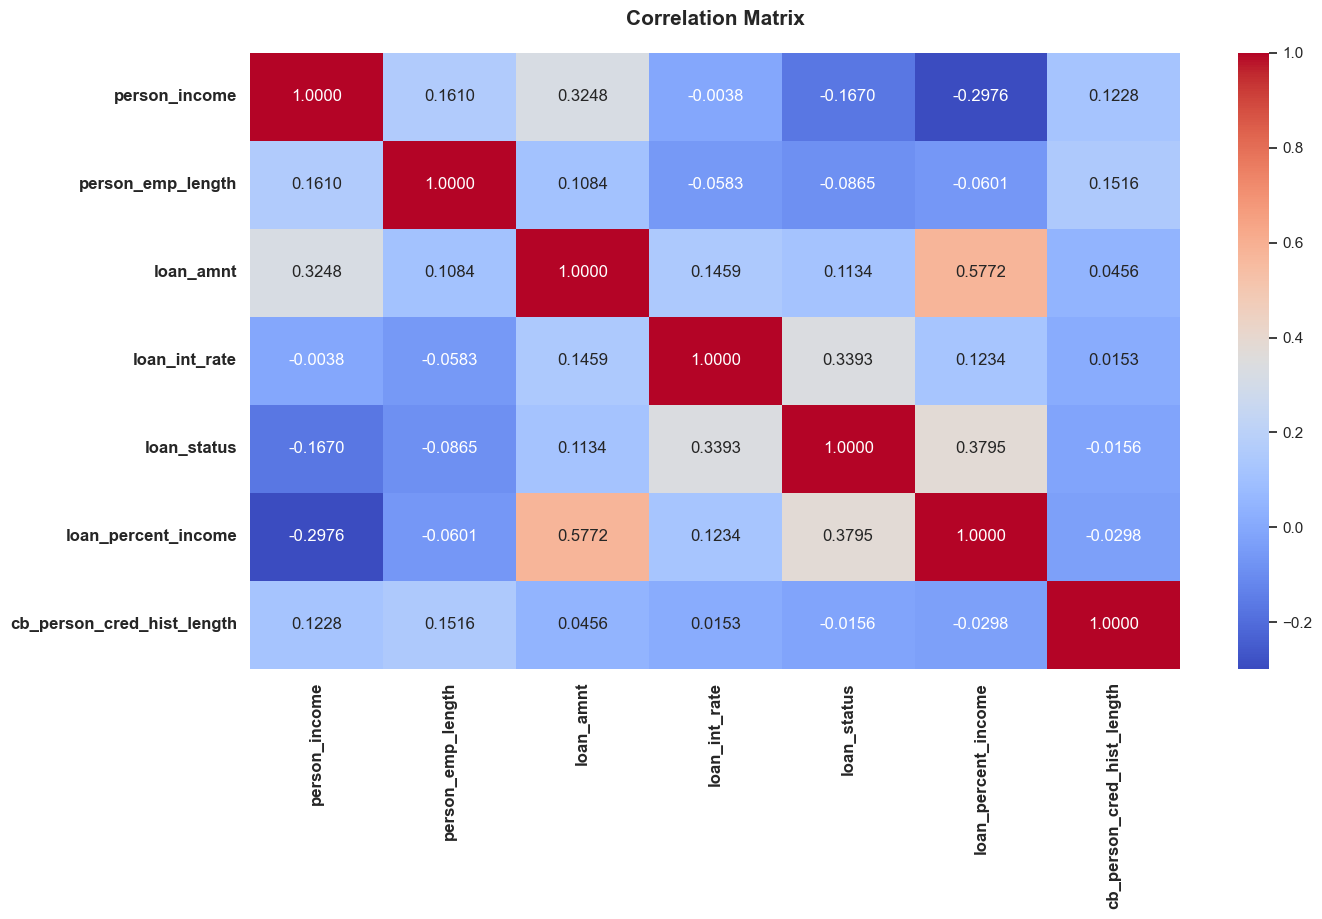

In [33]:
# Selecting only numeric columns
numeric_df_train = df_train.select_dtypes(include=['number'])

# Plotting the correlation matrix heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_df_train.corr(method='pearson'), annot=True, cmap="coolwarm", fmt='.4f')
plt.xticks(weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=12)
plt.title("Correlation Matrix", loc="center", pad=20, fontsize=15, fontweight="bold")

plt.show()

Some interesting correlations here. The highest one seems to be between loan_amnt and loan_percent_income which makes sense as one depends on the other

**Question: What other relationships can you find in this data?**

----

## **Pre-Processing Steps**

Preprocessing refers to the steps and techniques applied to raw data before it is used in a machine learning model or any analytical process. The goal of preprocessing is to transform and prepare the data in a way that makes it suitable for analysis or model training. Preprocessing can involve various tasks depending on the nature of the data and the requirements of the model.

**Splitting the data into a train and test set**

For this research, the data was splitted in 80% for training and 20% for testing. Remember this most always be performed before any type of pre processing steps that might alter the data

In [34]:
# Create a modeling dataset from the original dataset

X = df_train.copy(deep=True)

In [35]:
# Create the Target Variable

y = X['loan_status']

In [36]:
# Split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=0)

In [37]:
# Remove the Target from the training

X_train = X_train.drop(['loan_status'],axis = 1)
X_test = X_test.drop(['loan_status'],axis = 1)

### **Encoding Variables**

In [38]:
# Identify numerical and categorical variables

# Get numerical columns (assuming numerical data is stored in numeric types)
numerical_variables = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Get categorical columns (assuming non-numeric data is categorical)
categorical_variables = X_train.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

In [39]:
# Separate numerical and categorical columns

X_train_numerical = X_train[numerical_variables]
X_train_categorical = X_train[categorical_variables]

# Initialize the OneHotEncoder from category_encoders
ce_one_hot = ce.OneHotEncoder(cols=categorical_variables, use_cat_names=True)

# Fit and transform X_train_categorical
X_train_categorical_encoded = ce_one_hot.fit_transform(X_train_categorical)

# Concatenate numerical and one-hot encoded categorical columns
X_train = pd.concat([X_train_numerical, X_train_categorical_encoded], axis=1)

columns = X_train.columns

In [40]:
# Repeat the process for X_test

X_test_numerical = X_test[numerical_variables]
X_test_categorical = X_test[categorical_variables]

# Transform X_test_categorical (do not fit again, use the encoding learned from X_train)
X_test_categorical_encoded = ce_one_hot.transform(X_test_categorical)

# Concatenate numerical and one-hot encoded categorical columns for X_test
X_test = pd.concat([X_test_numerical, X_test_categorical_encoded], axis=1)

### **Scaling Features**

In [41]:
scaler = StandardScaler()

In [42]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Building an Artificial Neural Network**


---

To build an Artificial Neural Network we first need to import the necessary keras libraries as shown bellow. For this first model we will build a network with two hidden layers.

For a list of other optimizers: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [43]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta
from tensorflow.keras.callbacks import EarlyStopping

## **First Experiment**

In [44]:
# Initialising the ANN
model = Sequential()

#add input layer (layer 0)
model.add(Dense(input_dim = X_train.shape[1], units = 10, activation = 'relu'))

#add hidden layer (layer 1)
model.add(Dense(units = 10, activation = 'relu'))

#add ouptut layer
model.add(Dense(units = 1, activation = 'sigmoid'))
    
# Compiling the ANN
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                300       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 421 (1.64 KB)
Trainable params: 421 (1.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Fitting the model**

In [46]:
hist = model.fit(X_train, y_train, batch_size = 100, validation_split = 0.2, epochs = 100)

Epoch 1/100


184/184 [==============================] - 3s 5ms/step - loss: 0.3655 - accuracy: 0.8508 - val_loss: 0.3349 - val_accuracy: 0.8708
Epoch 2/100
184/184 [==============================] - 1s 3ms/step - loss: 0.3008 - accuracy: 0.8887 - val_loss: 0.3117 - val_accuracy: 0.8887
Epoch 3/100
184/184 [==============================] - 0s 3ms/step - loss: 0.2839 - accuracy: 0.8978 - val_loss: 0.3039 - val_accuracy: 0.8852
Epoch 4/100
184/184 [==============================] - 0s 3ms/step - loss: 0.2733 - accuracy: 0.9034 - val_loss: 0.2833 - val_accuracy: 0.9020
Epoch 5/100
184/184 [==============================] - 0s 2ms/step - loss: 0.2603 - accuracy: 0.9094 - val_loss: 0.2730 - val_accuracy: 0.9018
Epoch 6/100
184/184 [==============================] - 1s 3ms/step - loss: 0.2515 - accuracy: 0.9118 - val_loss: 0.2760 - val_accuracy: 0.9046
Epoch 7/100
184/184 [==============================] - 1s 3ms/step - loss: 0.2462 - accuracy: 0.9163 - val_loss: 0.2648 - val_accuracy: 0.90

**Predictions**

In [47]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

179/179 [==============================] - 0s 1ms/step


### **Performance Metrics**

<a id="7"></a>

---

Performance metrics are a part of every machine learning problem. Wether we are dealing with a classification or regression problem performance metrics are used to monitor and measure the performance of a model during training and testing. Since we are dealing with a classification problem the following performance metrics will be used:

- **Confusion Matrix:** Table layout which allows the visualization of the performance of an algorithm. A confusion matrix gives us four important measures:

    - True Positives (TP) – Default situations that are correctly classified as default.
    - True Negatives (TN) – Non-default situations that are correctly classified as non-default.
    - False Positives (FP) - Non-default applicants, but the model classified / predicted them as default. In statistics this is known as a Type I error. (a))
    - False Negatives (FN) – Default applicants, but the model classified / prediced them as non-default. In statistics this is known as a Type II error. (b))
    
    
a)  Type I Error (False Positive, FP): When the model predicts as defaulter but the applicant does not default (Affects profitability)

b)  Type II Error (False Negative, FN): Model predicts applicant as a non defaulter but he actually defaulted (affects losses and provisions)

- **Accuracy:** Accuracy simply refers to the number of correct predicitions divided by the total number of predictions.It is given by:

$$ Accuracy =  \frac{TP+TN}{TP+TN+FP+FN}$$

- **Precision Score**: Precision measures how accurately the model can capture default i.e out of the total predicted default cases, how many turned out to be default. 

$$ Precision =  \frac{TP}{TP+FP}$$

- **Recall/Sensitivity Score:** Recall or Sensitivity measures out of all the actual default cases; how many the model could predict correctly as default. 

     - It is known as the **True Positive Rate**

$$ Recall =  \frac{TP}{TP+FN}$$

- **F1 Score:** : F1 Score represents a balance between precision and recall. Mathematically:

$$ F1  Score = 2 * \frac {(precision * recall)}{(precision + recall)}$$

**Defining a funtion for the performance metrics**

In [48]:
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
    
    measures_list = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE']

    train_results = [
        accuracy_score(yTrain, yPredTrain.round()),
        precision_score(yTrain, yPredTrain.round()),
        recall_score(yTrain, yPredTrain.round()),
        f1_score(yTrain, yPredTrain.round())
    ]

    test_results = [
        accuracy_score(yTest, yPredTest.round()),
        precision_score(yTest, yPredTest.round()),
        recall_score(yTest, yPredTest.round()),
        f1_score(yTest, yPredTest.round())
    ]

    resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test': test_results})
    
    return resultsDF

**Defining a funtion for the confusion matrix**

In [49]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10, 7))
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.tight_layout()

**Plot Confusion Matrix**

Confusion matrix, without normalization


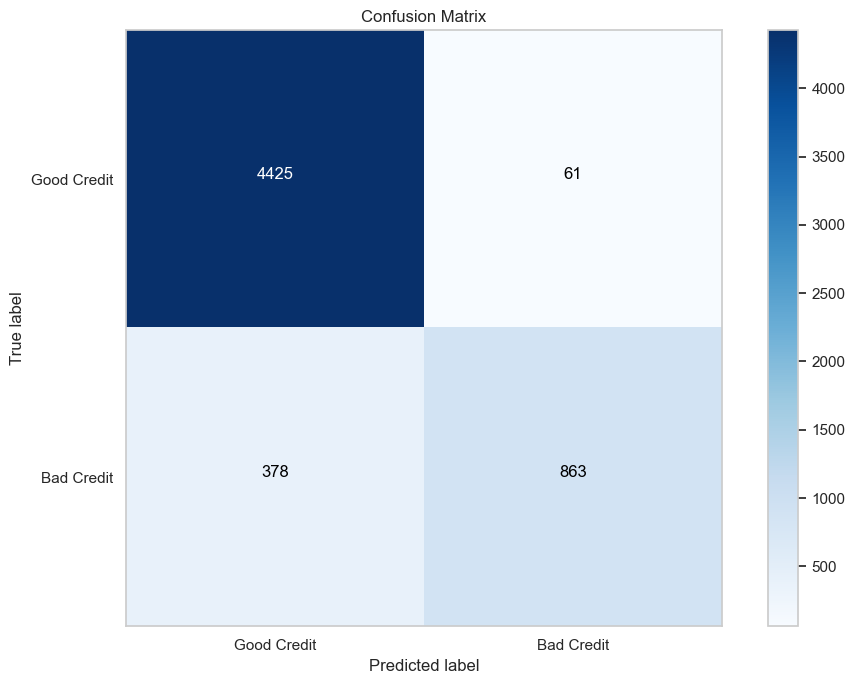

In [50]:
cm = confusion_matrix(y_test, y_test_pred.round())

plot_confusion_matrix(cm, classes = ['Good Credit','Bad Credit'], title = 'Confusion Matrix')

**Dataframe with results for the Positive Class (Predict Default)**

This Dataframe compiles the information of the positive class for the train and test set using the results of both classification reports

In [51]:
metrics_df = performanceMetricsDF(metrics, y_train, y_train_pred, y_test, y_test_pred)

metrics_df

,Measure,Train,Test
0,ACCURACY,0.929360,0.923346
1,PRECISION,0.962635,0.933983
2,RECALL,0.701068,0.695407
3,F1 SCORE,0.811290,0.797229


These initial results look promissing. The model was able to generalize well the data. The loss and accuracy curve seem to show a good relationship

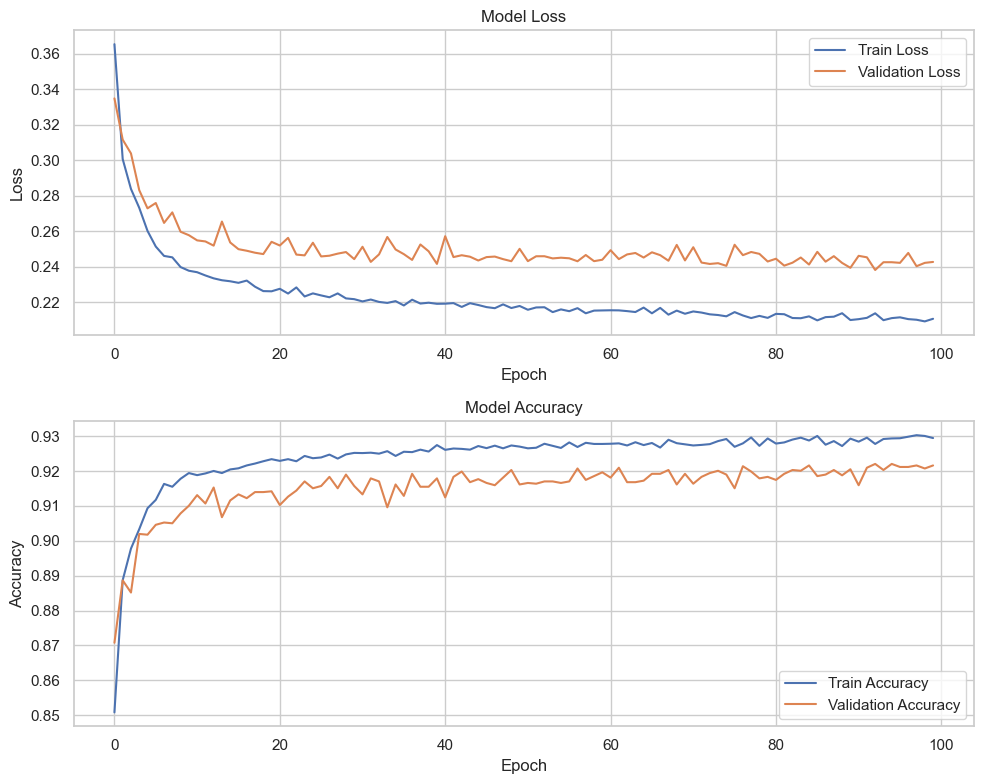

In [52]:
# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot training & validation loss values
ax1.plot(hist.history['loss'], label='Train Loss')
ax1.plot(hist.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training & validation accuracy values
ax2.plot(hist.history['accuracy'], label='Train Accuracy')
ax2.plot(hist.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

In [53]:
y_test_pred_classes = (y_test_pred > 0.5).astype(int)

# Reset the index of y_test
y_test_reset = y_test.reset_index(drop=True)

# Create a Series for predictions
prediction_series = pd.Series(y_test_pred_classes.flatten(), name='Predicted')

# Create a Series for actual
actual_series = pd.Series(y_test_reset, name='Actual')

# Concatenate into a DataFrame
results_df = pd.concat([y_test_reset, prediction_series], axis=1)

In [54]:
results_df.head()

,loan_status,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0


In [55]:
def permutation_importance(model, X, y, metric, threshold=0.5, num_repeats=10):
    # Get baseline score with original predictions
    preds = (model.predict(X) > threshold).astype(int)
    baseline_score = metric(y, preds)

    scores = np.zeros((X.shape[1], num_repeats))
    for i in range(X.shape[1]):
        for n in range(num_repeats):
            X_permuted = X.copy()
            np.random.shuffle(X_permuted[:, i])

            # Get predictions with permuted feature
            permuted_preds = (model.predict(X_permuted) > threshold).astype(int)
            permuted_score = metric(y, permuted_preds)

            scores[i, n] = baseline_score - permuted_score

    return np.mean(scores, axis=1)

# Calculate feature importance
importance_scores = permutation_importance(model, X_test, y_test, f1_score)

179/179 [==============================] - 0s 1ms/step


In [56]:
feature_importances_df = pd.DataFrame({
    'Feature': columns,
    'Score': importance_scores
})

# Sort the DataFrame by the 'Importance' column in descending order
feature_importances_df = feature_importances_df.sort_values(by='Score', ascending=False)

feature_importances_df.head()

,Feature,Score
4,loan_percent_income,0.272780
17,loan_grade_D,0.176330
7,person_home_ownership_RENT,0.095028
2,loan_amnt,0.077441
21,loan_grade_E,0.053396


**Feature Weights**

In [57]:
feature_df = pd.DataFrame(columns=['feature','layer','neuron','weight','abs_weight'])

for i,layer in enumerate(model.layers[:-1]): 
    w = layer.get_weights()
    w = np.array(w[0])
    n = 0
    for neuron in w.T:
        for f,name in zip(neuron,X.columns):
            feature_df.loc[len(feature_df)] = [name,i,n,f,abs(f)]
        
        n+=1
        
feature_df = feature_df.sort_values(by=['feature', 'layer', 'neuron'])
feature_df.reset_index(inplace=True)
feature_df = feature_df.drop(['index'], axis=1)

**Feature Bias**

In [58]:
bias_df = pd.DataFrame(columns=['layer', 'neuron', 'bias'])

for i, layer in enumerate(model.layers[:-1]):
    b = layer.get_weights()[1] 
    n_neurons = b.shape[0]
    
    layer_bias_df = pd.DataFrame({'layer': [i] * n_neurons, 'neuron': range(n_neurons), 'bias': b})
    bias_df = pd.concat([bias_df, layer_bias_df], ignore_index=True)

bias_df = bias_df.sort_values(by=['layer', 'neuron'])
bias_df.reset_index(inplace=True, drop=True)

-----------------------------

### **2nd Attempt**

In [59]:
# Initialising the ANN
model = Sequential()

#add input layer (layer 0)
model.add(Dense(input_dim = X_train.shape[1], units = 10, activation = 'relu'))

#add hidden layer (layer 1)
model.add(Dense(units = 10, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))

#add ouptut layer
model.add(Dense(units = 1, activation = 'sigmoid'))
    
# Compiling the ANN
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                300       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 421 (1.64 KB)
Trainable params: 421 (1.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Model Fit**

In [61]:
hist = model.fit(X_train, y_train, batch_size = 100, validation_split = 0.2, epochs = 100)

Epoch 1/100
184/184 [==============================] - 2s 4ms/step - loss: 0.6121 - accuracy: 0.7348 - val_loss: 0.4866 - val_accuracy: 0.8149
Epoch 2/100
184/184 [==============================] - 1s 3ms/step - loss: 0.4236 - accuracy: 0.8468 - val_loss: 0.4040 - val_accuracy: 0.8603
Epoch 3/100
184/184 [==============================] - 1s 3ms/step - loss: 0.3659 - accuracy: 0.8734 - val_loss: 0.3720 - val_accuracy: 0.8723
Epoch 4/100
184/184 [==============================] - 1s 4ms/step - loss: 0.3415 - accuracy: 0.8815 - val_loss: 0.3541 - val_accuracy: 0.8784
Epoch 5/100
184/184 [==============================] - 1s 5ms/step - loss: 0.3274 - accuracy: 0.8886 - val_loss: 0.3424 - val_accuracy: 0.8799
Epoch 6/100
184/184 [==============================] - 1s 5ms/step - loss: 0.3168 - accuracy: 0.8905 - val_loss: 0.3336 - val_accuracy: 0.8850
Epoch 7/100
184/184 [==============================] - 1s 5ms/step - loss: 0.3080 - accuracy: 0.8958 - val_loss: 0.3247 - val_accuracy: 0.8898

**Predictions**

In [62]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

179/179 [==============================] - 0s 1ms/step


**Confusion Matrix**

Confusion matrix, without normalization


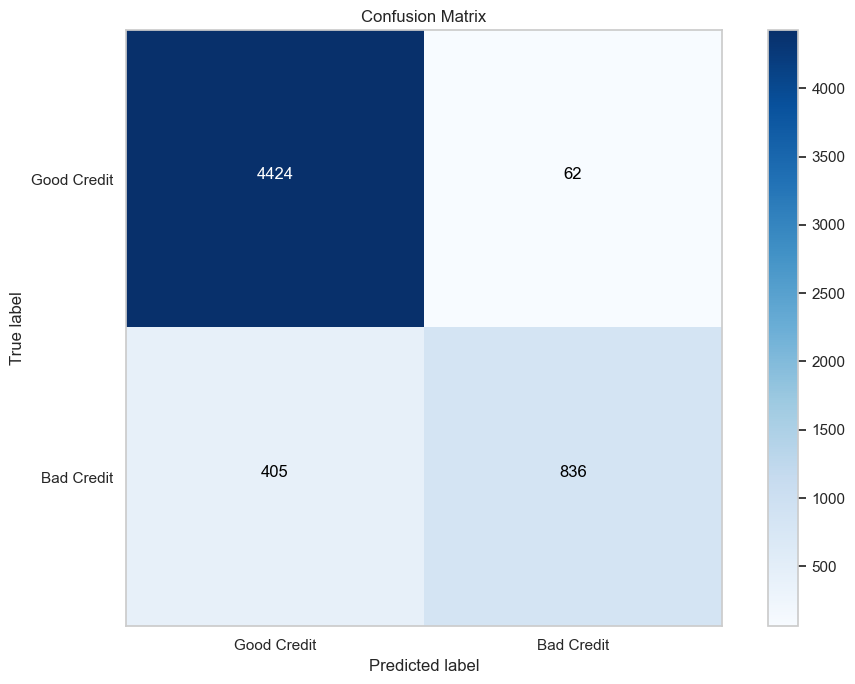

In [63]:
cm = confusion_matrix(y_test, y_test_pred.round())

plot_confusion_matrix(cm, classes = ['Good Credit','Bad Credit'], title = 'Confusion Matrix')

**Dataframe with results for the Positive Class (Predict Default)**

In [64]:
metrics_df = performanceMetricsDF(metrics, y_train, y_train_pred, y_test, y_test_pred)

metrics_df

,Measure,Train,Test
0,ACCURACY,0.921720,0.918456
1,PRECISION,0.943201,0.930958
2,RECALL,0.679500,0.673650
3,F1 SCORE,0.789924,0.781674


**Charts for both the loss and accuracy performance**

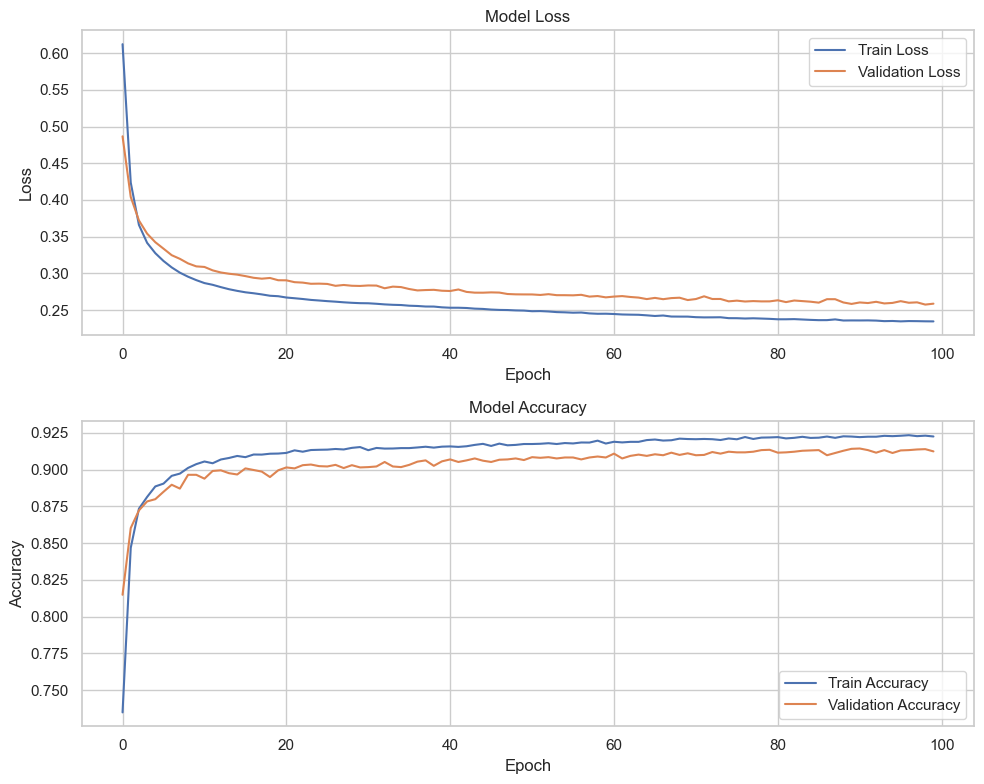

In [65]:
# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot training & validation loss values
ax1.plot(hist.history['loss'], label='Train Loss')
ax1.plot(hist.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training & validation accuracy values
ax2.plot(hist.history['accuracy'], label='Train Accuracy')
ax2.plot(hist.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

### **3rd Attempt**

In [66]:
# Initialising the ANN
model = Sequential()

#add input layer (layer 0)
model.add(Dense(input_dim = X_train.shape[1], units = 10, activation = 'relu'))

#add hidden layer (layer 1)
model.add(Dense(units = 10, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))

#add ouptut layer
model.add(Dense(units = 1, activation = 'sigmoid'))
    
# Compiling the ANN
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [67]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                300       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 421 (1.64 KB)
Trainable params: 421 (1.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Model Fit**

In [69]:
hist = model.fit(X_train, y_train, batch_size = 100, validation_split = 0.2, epochs = 100, callbacks = [early_stopping])

Epoch 1/100
184/184 [==============================] - 2s 4ms/step - loss: 0.5714 - accuracy: 0.7874 - val_loss: 0.4852 - val_accuracy: 0.8083
Epoch 2/100
184/184 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8475 - val_loss: 0.4061 - val_accuracy: 0.8640
Epoch 3/100
184/184 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8755 - val_loss: 0.3750 - val_accuracy: 0.8736
Epoch 4/100
184/184 [==============================] - 0s 3ms/step - loss: 0.3429 - accuracy: 0.8816 - val_loss: 0.3573 - val_accuracy: 0.8788
Epoch 5/100
184/184 [==============================] - 0s 3ms/step - loss: 0.3289 - accuracy: 0.8857 - val_loss: 0.3453 - val_accuracy: 0.8808
Epoch 6/100
184/184 [==============================] - 0s 2ms/step - loss: 0.3191 - accuracy: 0.8910 - val_loss: 0.3372 - val_accuracy: 0.8847
Epoch 7/100
184/184 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8928 - val_loss: 0.3303 - val_accuracy: 0.8880

**Predictions**

In [70]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

179/179 [==============================] - 0s 1ms/step


**Confusion Matrix**

Confusion matrix, without normalization


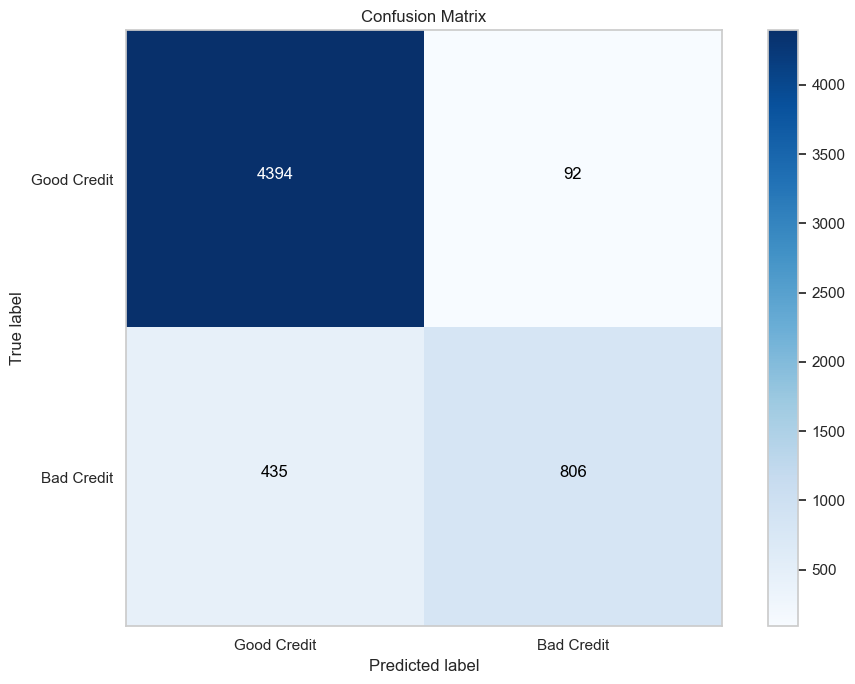

In [71]:
cm = confusion_matrix(y_test, y_test_pred.round())

plot_confusion_matrix(cm, classes = ['Good Credit','Bad Credit'], title = 'Confusion Matrix')

**Dataframe with results for the Positive Class (Predict Default)**

In [72]:
metrics_df = performanceMetricsDF(metrics, y_train, y_train_pred, y_test, y_test_pred)

metrics_df

,Measure,Train,Test
0,ACCURACY,0.913294,0.907980
1,PRECISION,0.915851,0.897550
2,RECALL,0.660351,0.649476
3,F1 SCORE,0.767393,0.753623


**Charts for both the loss and accuracy performance**

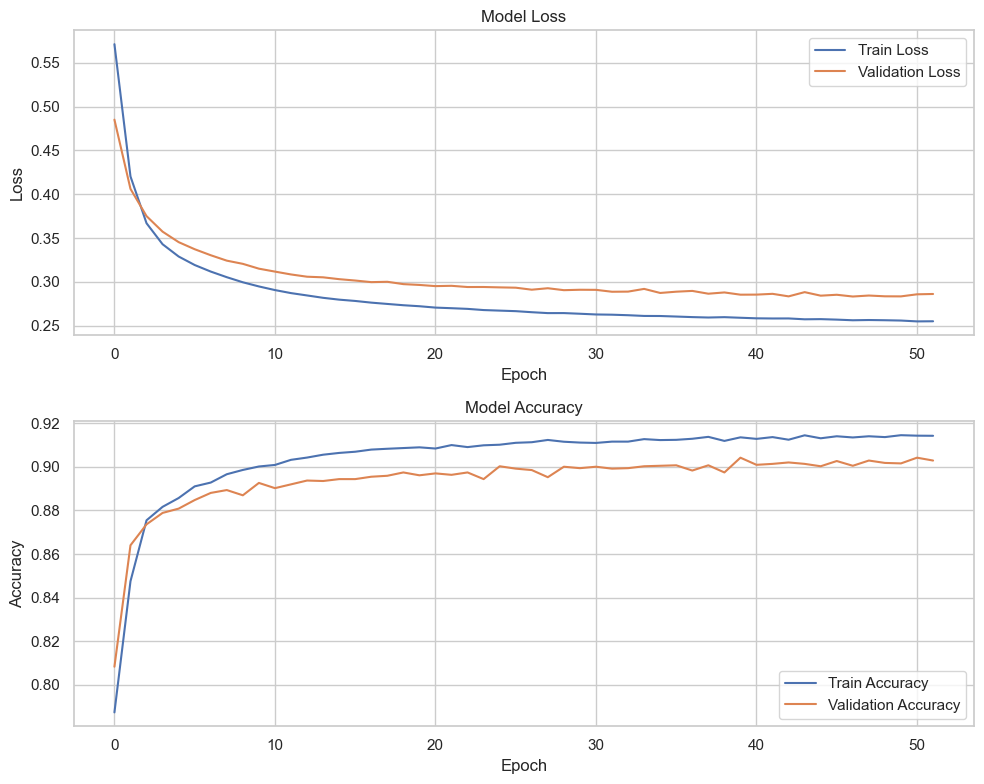

In [73]:
# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot training & validation loss values
ax1.plot(hist.history['loss'], label='Train Loss')
ax1.plot(hist.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training & validation accuracy values
ax2.plot(hist.history['accuracy'], label='Train Accuracy')
ax2.plot(hist.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()